In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates
import seaborn as sns
import string
%matplotlib inline
import os
import datetime 
import emoji
from tqdm import tqdm_notebook

In [2]:
df = pd.read_csv('allMsgs.csv', index_col = 0,  encoding = 'utf-8-sig')
df.loc[df.Label == ')', 'Label'] = "Family"
df.loc[df.Label == 'd', 'Label'] = "Friends"
df.loc[df.Label == 'D', 'Label'] = "Friends"

In [3]:
df.head()

,Sender,Content,Date and time,Label
1,Me,Jao,2018-04-23 11:33:00,Me
2,Me,Ako sam ista manje ocekivao...,2018-04-23 11:33:00,Me
3,Me,Bajrambarecola,2018-06-15 06:23:00,Me
4,Me,Sve najbolje,2018-06-15 06:23:00,Me
5,Me,😉,2018-06-15 06:23:00,Me


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201242 entries, 1 to 188915
Data columns (total 4 columns):
Sender           201242 non-null object
Content          201242 non-null object
Date and time    201242 non-null object
Label            201242 non-null object
dtypes: object(4)
memory usage: 7.7+ MB


In [5]:
df['Date and time'] = pd.to_datetime(df['Date and time'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201242 entries, 1 to 188915
Data columns (total 4 columns):
Sender           201242 non-null object
Content          201242 non-null object
Date and time    201242 non-null datetime64[ns]
Label            201242 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 7.7+ MB


In [7]:
df.describe()

,Sender,Content,Date and time,Label
count,201242,201242,201242,201242
unique,28,149344,183401,4
top,Me,Ok,2019-03-04 12:56:00,Me
freq,89830,1240,15,89830
first,NaN,NaN,2018-03-30 14:35:23,NaN
last,NaN,NaN,2019-05-10 12:42:57,NaN


In [8]:
df['Date and time'].dt.hour.value_counts().head()

22    18746
23    17836
21    15405
11    14883
12    14520
Name: Date and time, dtype: int64

In [9]:
# Splitting messages to SENT and RECEIVED

sentMsgs = df[df['Label'] == 'Me']
receivedMsgs = df[df['Label'] != 'Me']

In [10]:
# geting emojis from all text

emojiLst = []
for i in df['Content']:    
    if type(i) == float:
        continue
    for j in i:
        if j in emoji.UNICODE_EMOJI:
                emojiLst.append(j)

In [11]:
# Sent emojis

sentEmojiLst = []
for i in sentMsgs['Content']:    
    if type(i) == float:
        continue
    for j in i:
        if j in emoji.UNICODE_EMOJI:
                sentEmojiLst.append(j)
                
sentEmojis = pd.DataFrame(sentEmojiLst)

In [12]:
# Received emojis

receivedEmojiLst = []
for i in receivedMsgs['Content']:    
    if type(i) == float:
        continue
    for j in i:
        if j in emoji.UNICODE_EMOJI:
                receivedEmojiLst.append(j)
                
receivedEmojis = pd.DataFrame(receivedEmojiLst)

In [13]:
emojis = pd.DataFrame(emojiLst)

In [14]:
# most used emojis

emojis[0].value_counts().head()

😊    654
😁    392
😂    361
👍    256
😍    219
Name: 0, dtype: int64

In [15]:
topSentE = sentEmojis[0].value_counts().head(10)

In [16]:
topRecE = receivedEmojis[0].value_counts().head(10)

/home/erol/jupyter/jupyter/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Segoe UI Emoji'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


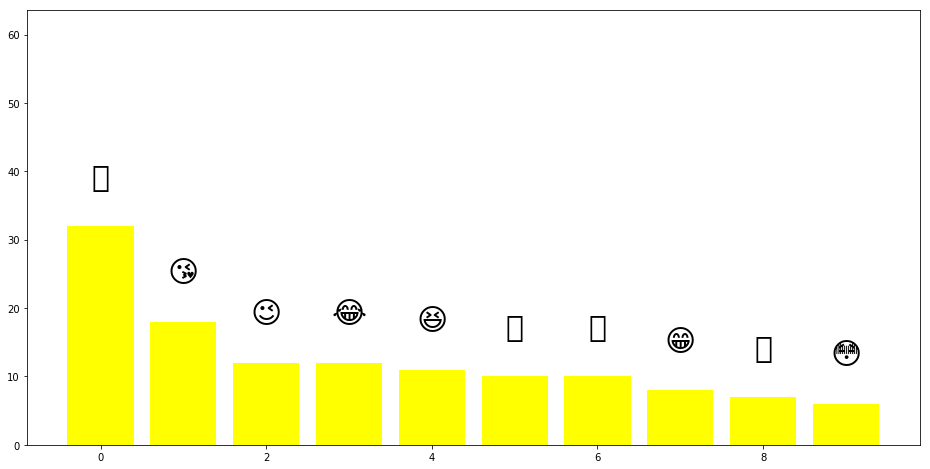

👍    32
😘    18
😉    12
😂    12
😆    11
🥳    10
👏    10
😁     8
👌     7
😳     6
Name: 0, dtype: int64

In [17]:
freqs = topSentE.values
labels = topSentE.index
plt.figure(figsize=(16,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="yellow")
plt.ylim(0, plt.ylim()[1]+30)

# Make labels
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontname='Segoe UI Emoji',
    )
    
plt.show()

topSentE

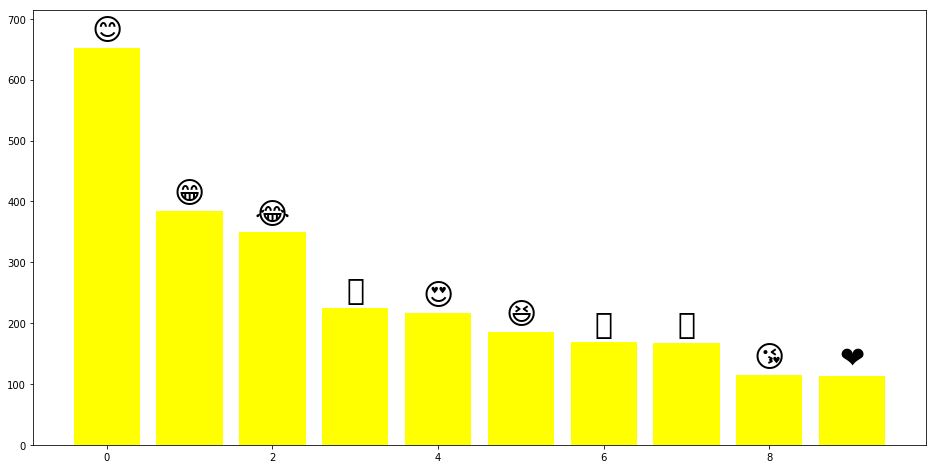

😊    652
😁    384
😂    349
👍    224
😍    216
😆    185
💪    169
🎉    168
😘    115
❤    113
Name: 0, dtype: int64

In [18]:
freqs = topRecE.values
labels = topRecE.index
plt.figure(figsize=(16,8))
p1 = plt.bar(np.arange(len(labels)), freqs, 0.8, color="yellow")
plt.ylim(0, plt.ylim()[1]+30)

# Make labels
for rect1, label in zip(p1, labels):
    height = rect1.get_height()
    plt.annotate(
        label,
        (rect1.get_x() + rect1.get_width()/2, height+5),
        ha="center",
        va="bottom",
        fontsize=30,
        fontname='Segoe UI Emoji'
    )
    
plt.show()

topRecE

In [19]:
df.Sender.value_counts()

Me                                      89830
Berina                                  76344
Mob ;Aida;Munevera                      10448
Mob ;Aida                                5520
Alen Garibović                           3011
Mob ;Aida;lamija;Munevera;Enes;Edina     2980
Munevera                                 2502
Pasha                                    2203
Selim Huskić                             1743
Eldar Muharemovic                        1291
Mob ;Aida;Munevera;Amir Ligata           1215
lamija                                    861
Mob ;Aida;Amir Ligata                     467
Bakir Mob                                 424
Nadir Karavdic                            411
Vir Triumphalis                           401
Vareta                                    354
Kemal Aljic                               273
Antonio                                   213
Aida Ligata                               182
Amir Ligata                               144
Plaki                             

In [20]:
df.Label.value_counts()

Me         89830
Gf         76344
Family     24269
Friends    10799
Name: Label, dtype: int64

In [21]:
df = df.sort_values(by='Date and time')

In [22]:
df['Date and time'].dt.year.value_counts()

2018    143327
2019     57915
Name: Date and time, dtype: int64

In [23]:
df['Date and time'].dt.month.value_counts()

4     35157
5     22327
9     15562
3     15356
10    15290
8     14843
11    14372
2     14360
1     14306
12    14012
7     13211
6     12446
Name: Date and time, dtype: int64

In [24]:
df['Date and time'].dt.day.value_counts().head()

16    8016
12    7813
6     7753
7     7632
4     7572
Name: Date and time, dtype: int64

In [25]:
df['Date and time'].dt.hour.value_counts().head()

22    18746
23    17836
21    15405
11    14883
12    14520
Name: Date and time, dtype: int64

In [26]:
df.Content.value_counts().head(10)

Ok         1240
?          1010
Hun         919
Haha        818
Hahaha      642
Da          516
:)          472
(happy)     462
...         423
Super       373
Name: Content, dtype: int64

In [27]:
sentMsgs.Content.value_counts().head(10)

?          591
Ok         566
Haha       465
Hun        438
(happy)    437
...        362
Hahaha     285
Ok ok      182
Hajde      160
(shy)      151
Name: Content, dtype: int64

In [28]:
receivedMsgs.Content.value_counts().head(10)

Ok        674
Hun       481
:)        443
Da        431
?         419
Hahaha    357
Haha      353
Eto       246
Okej      244
Super     239
Name: Content, dtype: int64

Text(0.5, 0, 'Monthly')

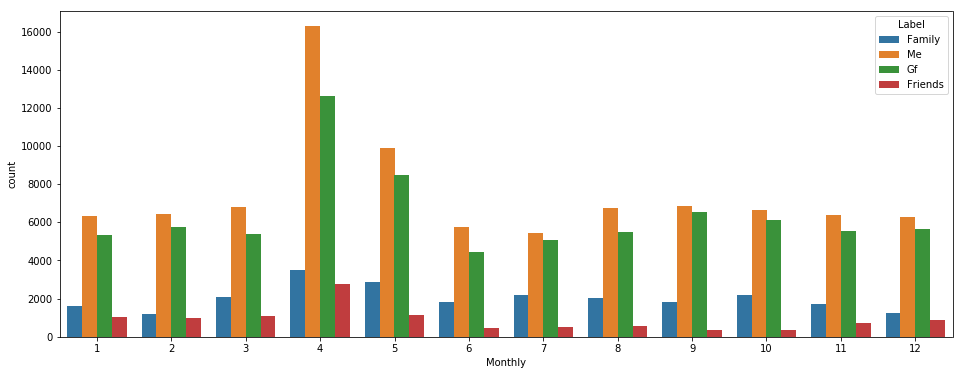

In [29]:
plt.figure(figsize=(16, 6))
ax = sns.countplot( df['Date and time'].dt.month, hue = df['Label'])
ax.set_xlabel("Monthly")

Text(0.5, 0, 'All time')

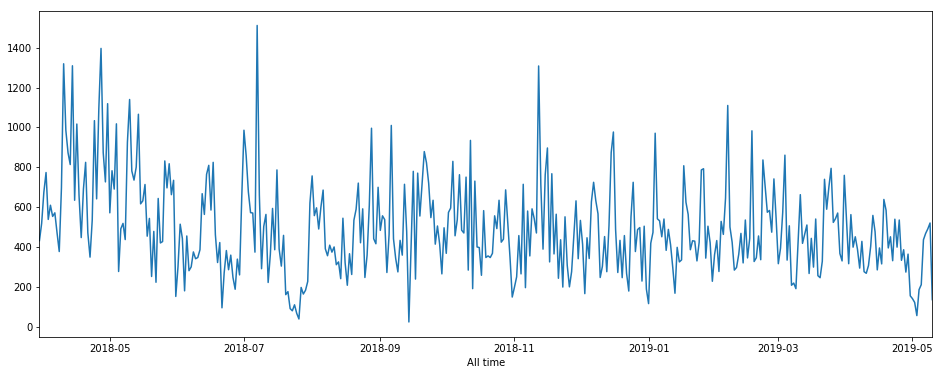

In [30]:
plt.figure(figsize=(16, 6))
ax = df.groupby(df['Date and time'].dt.date).count()['Content'].plot()
ax.set_xlabel("All time")

Text(0.5, 0, 'Sent All time')

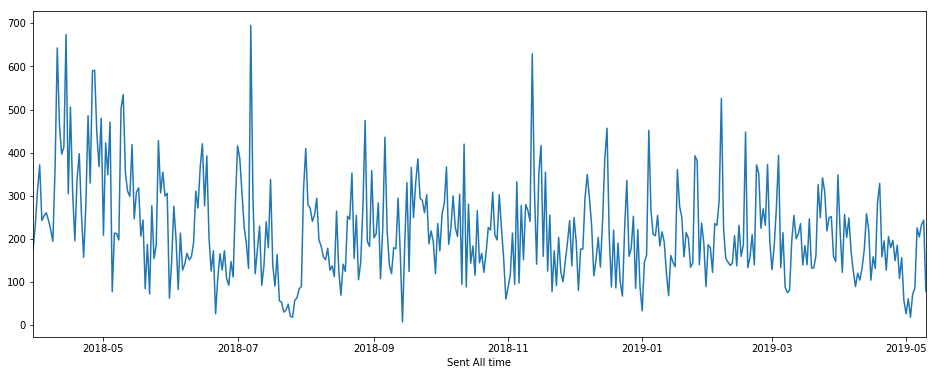

In [31]:
plt.figure(figsize=(16, 6))
ax = sentMsgs.groupby(sentMsgs['Date and time'].dt.date).count()['Content'].plot()
ax.set_xlabel("Sent All time")

Text(0.5, 0, 'Received All time')

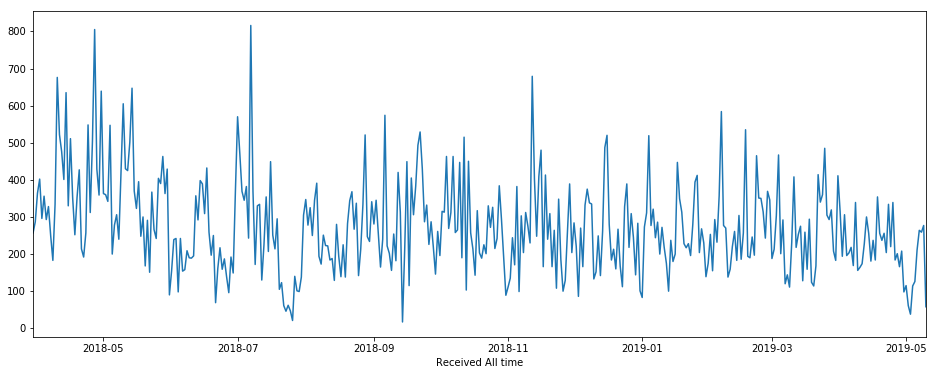

In [32]:
plt.figure(figsize=(16, 6))
ax = receivedMsgs.groupby(receivedMsgs['Date and time'].dt.date).count()['Content'].plot()
ax.set_xlabel("Received All time")

Text(0.5, 0, 'Received All time')

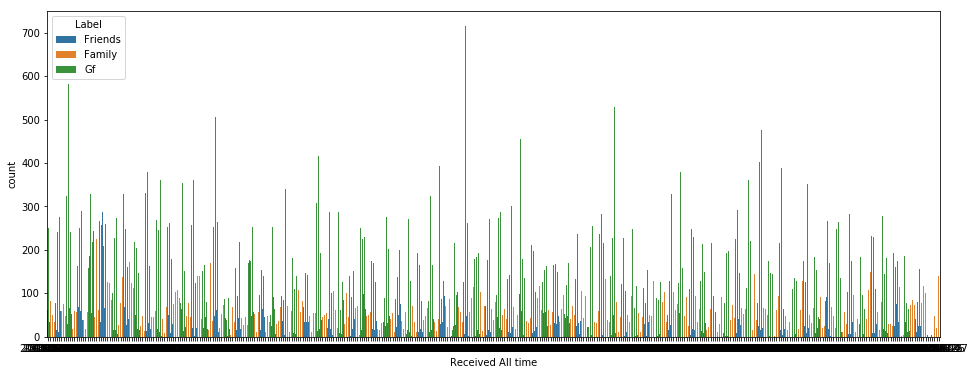

In [33]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(receivedMsgs['Date and time'].dt.date, hue = receivedMsgs['Label'])
ax.set_xlabel("Received All time")

Text(0.5, 0, 'Hourly')

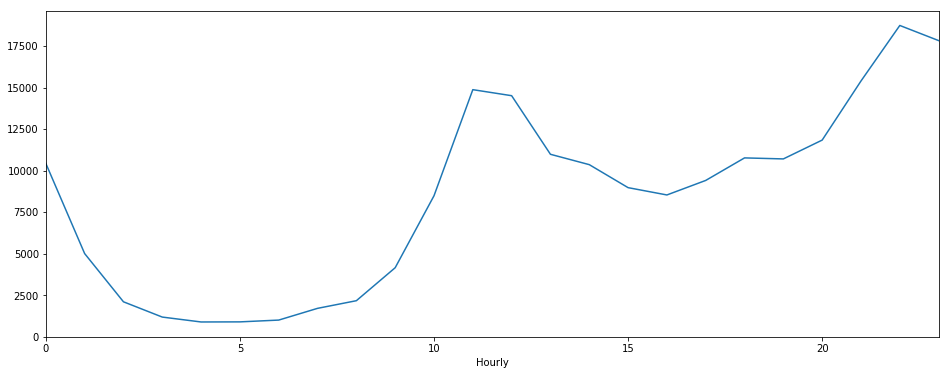

In [34]:
plt.figure(figsize=(16, 6))
ax = df.groupby(df['Date and time'].dt.hour).count()['Content'].plot()
ax.set_xlabel("Hourly")

Text(0.5, 0, 'Hourly')

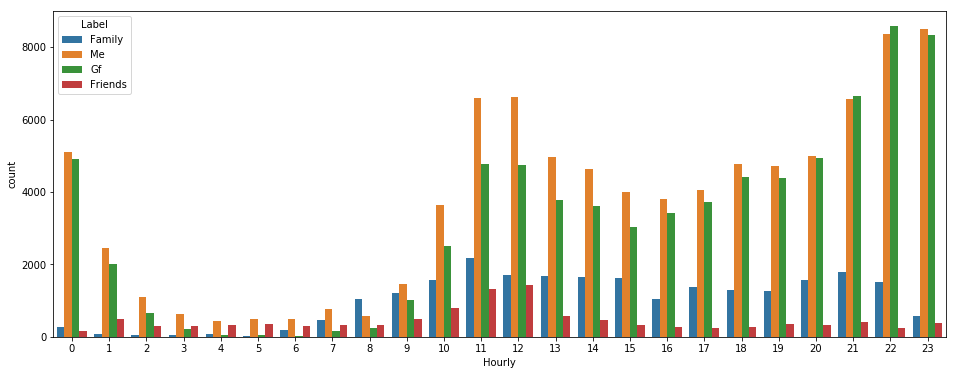

In [35]:
plt.figure(figsize=(16, 6))
ax = sns.countplot( df['Date and time'].dt.hour, hue = df['Label'])
ax.set_xlabel("Hourly")

In [57]:
sentMsgs['Msg len'] = sentMsgs['Content'].str.len()

sentMsgs.head()

,Sender,Content,Date and time,Label,Msg len
1,Me,Jao,2018-04-23 11:33:00,Me,3
2,Me,Ako sam ista manje ocekivao...,2018-04-23 11:33:00,Me,30
3,Me,Bajrambarecola,2018-06-15 06:23:00,Me,14
4,Me,Sve najbolje,2018-06-15 06:23:00,Me,12
5,Me,😉,2018-06-15 06:23:00,Me,1


In [58]:
receivedMsgs['Msg len'] = receivedMsgs['Content'].str.len()

receivedMsgs.head()


,Sender,Content,Date and time,Label,Msg len
6,Harun Smailbegović,"Allah raziolsun, takodjer 😄",2018-06-15 07:52:00,Friends,27
7,Harun Smailbegović,https://m.youtube.com/watch?v=VOVmVMJEhg8https...,2018-07-01 12:46:00,Friends,96
11,Harun Smailbegović,"hahaha, javi kad pogledas video",2018-07-01 12:53:00,Friends,31
33,Harun Smailbegović,Evo iskreno trazim bilo kakve tene da mogu igr...,2018-07-08 04:40:00,Friends,64
36,Harun Smailbegović,hocete shishat gdje u gradu,2018-07-08 06:51:00,Friends,27


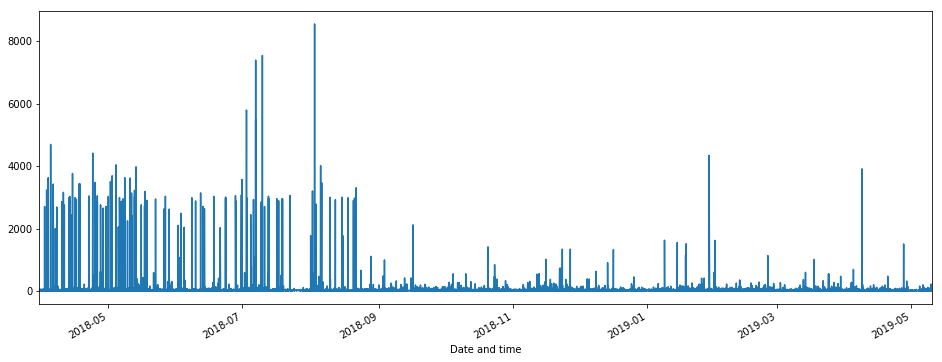

In [59]:
plt.figure(figsize=(16,6))

sentMsgs.groupby(['Date and time'])['Msg len'].mean().plot()


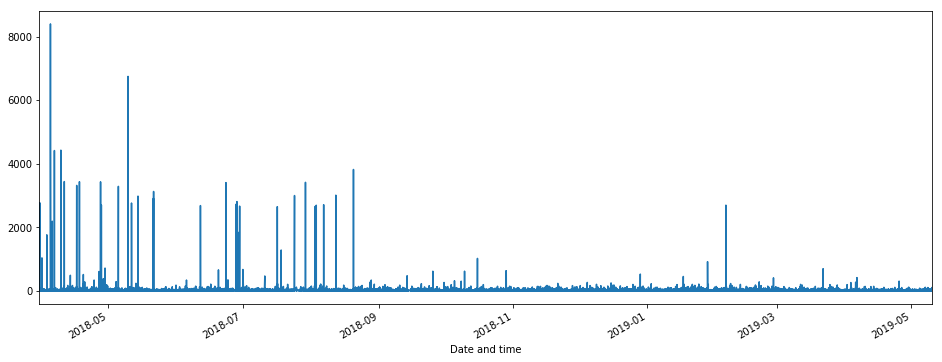

In [60]:
plt.figure(figsize=(16,6))

receivedMsgs.groupby(['Date and time'])['Msg len'].mean().plot()


In [67]:
sentMsgs[sentMsgs['Msg len'] == sentMsgs['Msg len'].max()]['Content'].values


array(['[{"HighlightLinks":true,"MaxLinesNumber":0,"Underline":false,"Bold":false,"Width":1,"HighlightEmoticons":true,"Type":"txt","Size":2,"Color":"3289650","iOS_HighlightOnTap":false,"Text":"Dear Berina Zornic,\\r\\rThank you for contacting PayPal. My name is Ben and I\'m very pleased to take this opportunity to assist you today.\\r\\rIf you send us in proof of identity and a recent card statement we will be able to remove the card from any other account its showing linked to.\\r\\rBelow I have included the link to use to upload your documents for review.\\r\\rhttp:\\/\\/www.paypal.com\\/il\\/uploaddoc\\r\\rOnce you have uploaded your documents, please respond to this email as confirmation that your documents were uploaded and we will ensure the documents are reviewed as soon as possible\\r\\rA member of our specialist team carrying out the review will be in contact with you through email as soon as this review is completed.\\r\\rIn case you need any further assistance, please do not

In [68]:
receivedMsgs[receivedMsgs['Msg len'] == receivedMsgs['Msg len'].max()]['Content'].values


array(['[{"HighlightLinks":true,"MaxLinesNumber":0,"Underline":false,"Bold":false,"Width":1,"HighlightEmoticons":true,"Type":"txt","Size":2,"Color":"3289650","iOS_HighlightOnTap":false,"Text":"https:\\/\\/www.booking.com\\/hotel\\/de\\/pension-eberty.html?aid=304142;label=gen173nr-1FCAEoggJCAlhYSDNYBGgViAEBmAExwgEKd2luZG93cyAxMMgBDNgBAegBAfgBApICAXmoAgM;sid=35e327fdb46ea8e7e5f96ba152b0155f;all_sr_blocks=191988402_93080764_2_0_0;bshb=2;checkin=2018-06-18;checkout=2018-06-25;dest_id=-1746443;dest_type=city;dist=0;group_adults=2;hapos=4;highlighted_blocks=191988402_93080764_2_0_0;hpos=4;map=1;nflt=pri%3D1%3Bpri%3D2%3Bht_id%3D204;room1=A%2CA;sb_price_type=total;srepoch=1522849499;srfid=09236ef3c2a3bfa9c6e407385cb3f874b2a0bc77X4;srpvid=4cfa60ac6cb10107;type=total;ucfs=1tab-main","Italic":false},{"iOS_bundleImageName":null,"ImageUrl":"https:\\/\\/t-ec.bstatic.com\\/images\\/hotel\\/max300\\/769\\/76994358.jpg","Action":{"name":"openurl","parameters":{"url":"https:\\/\\/www.booking.com\\/hote

In [ ]:
x = df.groupby(df['Date and time'].dt.date)

In [ ]:
x